### Problem Statement

This report presents an in-depth analysis of a manufacturing dataset obtained from a simulated real-world manufacturing process. The dataset aims to capture the complex relationships between various process parameters and the resulting quality of the manufactured products. Understanding these relationships is crucial for optimizing the manufacturing process, reducing defects, and improving overall product quality.
The primary objective of this analysis is to develop a robust machine learning model that can accurately predict the quality rating of manufactured items based on the given process parameters. By leveraging the power of polynomial regression, the model aims to capture the potentially nonlinear relationships between the feature variables and the target variable.

### Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataframe

In [3]:
df = pd.read_csv('DATA/manufacturing.csv')

In [4]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


### EDA

#### Missing Values

In [5]:
df.isna().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [6]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


#### Data Correlation

In [10]:
corr = df.corr()
corr

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


<Axes: >

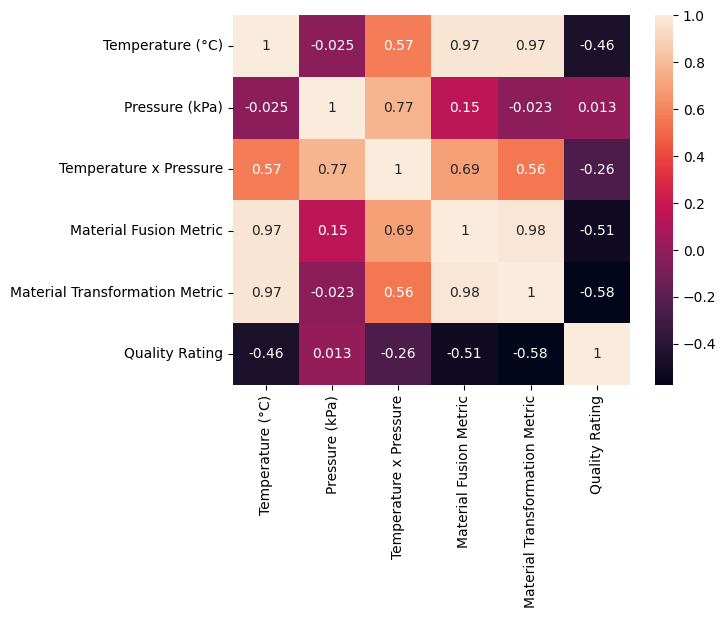

In [12]:
sns.heatmap(corr,annot=True)

#### Pair Plot

C:\Users\TIERA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


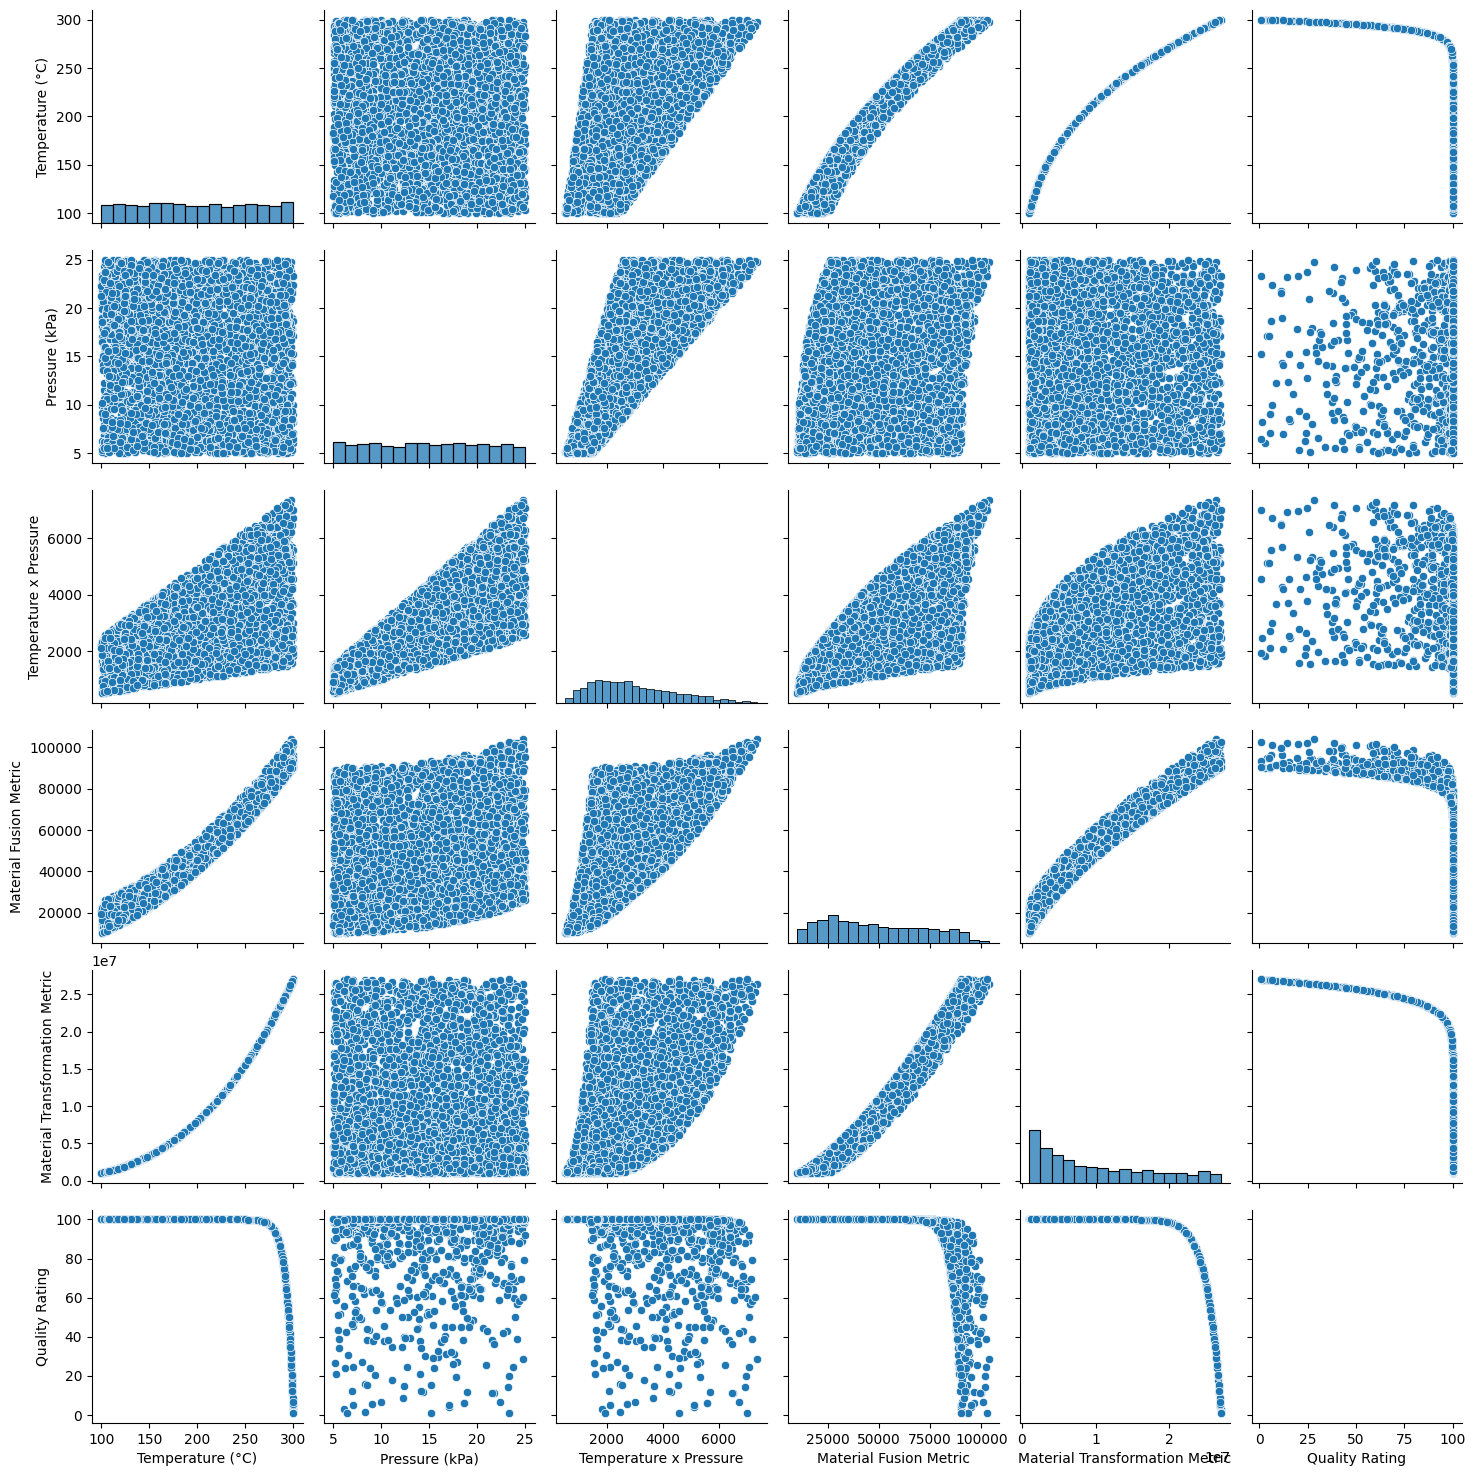

In [13]:
sns.pairplot(df)

#### KDE Plot

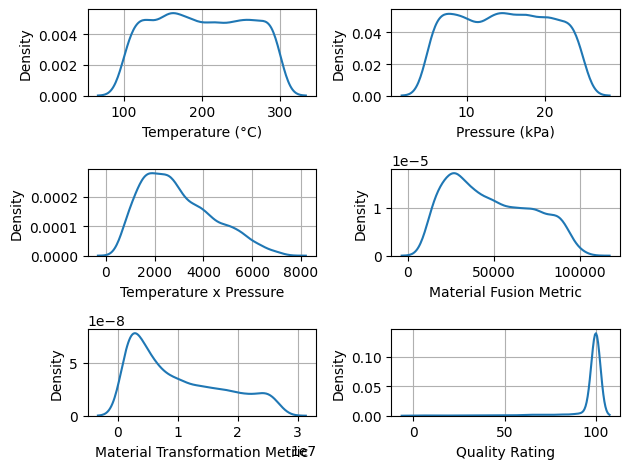

In [24]:
r = 3
c = 2
it = 1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.kdeplot(df[i])
    plt.grid()
    it += 1
plt.tight_layout()
plt.show()
    

#### Boxplot

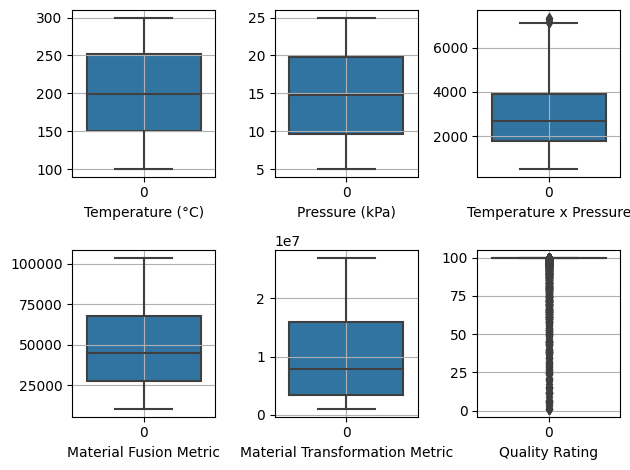

In [96]:
r = 2
c = 3
it = 1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.grid()
    it += 1
plt.tight_layout()
plt.show()

In [88]:
X = df.drop(['Quality Rating'],axis=1)
Y = df['Quality Rating']

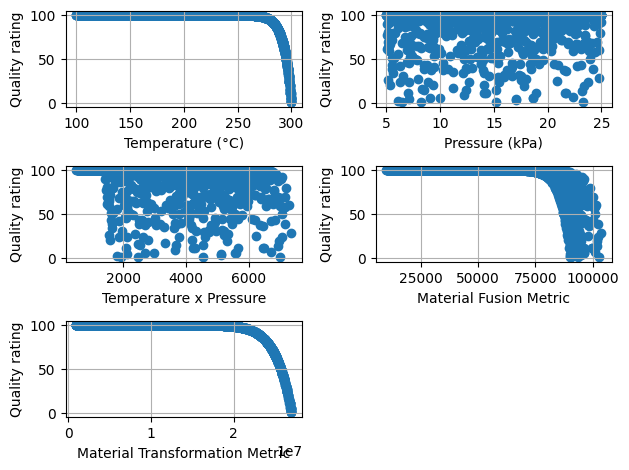

In [90]:
r = 3
c = 2
it = 1
for i in X.columns:
    plt.subplot(r,c,it)
    plt.scatter(X[i],Y)
    plt.xlabel(i)
    plt.ylabel('Quality rating')
    plt.grid()
    it += 1
plt.tight_layout()
plt.show()

### Feature Transformation

#### Feature Scaling

In [64]:
## Scale Input Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [157]:
## Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(X)

#### Train Test Split

In [158]:
## train test split
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x_poly,Y,test_size=0.3,random_state=42)

### Linear Regression

In [159]:
## linear regn
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

### Evaluation Metrics

In [160]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model,x_poly,Y,cv=5,scoring='r2')
print(f"Mean Cross-Validation Score: {np.abs(scores.mean()):.4f}")

Mean Cross-Validation Score: 0.9930


In [143]:
lr_model.fit(train_x,train_y)

LinearRegression()

In [144]:
lr_model.coef_

array([ 1.37957742e-18,  1.97187227e-17, -3.30551910e-20, -3.54459574e-21,
        2.97674840e-23, -2.99597973e-24,  5.16728394e-25, -1.19384606e-26,
        2.12639090e-25,  3.88445550e-25, -1.52046178e-22,  1.12124887e-27,
        6.74318737e-26,  5.03850850e-25,  1.86836878e-23,  6.65755538e-24,
        4.75340450e-23,  1.38048423e-21,  2.32748642e-22, -5.28495141e-21,
       -1.58352506e-18, -1.08733116e-24,  2.19436353e-25,  1.86978132e-23,
       -9.89310364e-24, -1.75987750e-20,  6.74556713e-26,  6.65756275e-24,
        4.75340497e-23,  1.38048423e-21,  6.01248119e-22,  4.06254739e-21,
        8.21718278e-20,  1.63280776e-20, -7.03092760e-19, -9.02458859e-17,
        1.41221663e-26,  1.46616972e-24,  1.21163161e-23,  6.00963769e-22,
        1.42083750e-22,  1.13439087e-21,  4.69936947e-20,  8.50538375e-21,
        2.97437567e-19,  3.49267685e-18,  1.23192823e-20,  9.34305215e-20,
        2.83141155e-18,  6.61795257e-19,  1.66959471e-17,  9.23356181e-17,
        3.64169822e-18,  

In [145]:
lr_model.intercept_

100.13872187560774

In [146]:
## Predicted values
y_pred = lr_model.predict(test_x)

In [147]:
## Evaluate Model on training
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lr_model.predict(train_x)
print(f"Mean Squared Error={mean_squared_error(y_pred=y_pred_train,y_true=train_y)}\nR Squared Score={r2_score(y_pred=y_pred_train,y_true=train_y)}")

Mean Squared Error=1.0425045170323066
R Squared Score=0.9932806399996608


In [148]:
## Evaluate Model on test data
from sklearn.metrics import r2_score, mean_squared_error
print(f"Mean Squared Error={mean_squared_error(y_pred=y_pred,y_true=test_y)}\nR Squared Score={r2_score(y_pred=y_pred,y_true=test_y)}")

Mean Squared Error=1.390015347254514
R Squared Score=0.9930613801213897


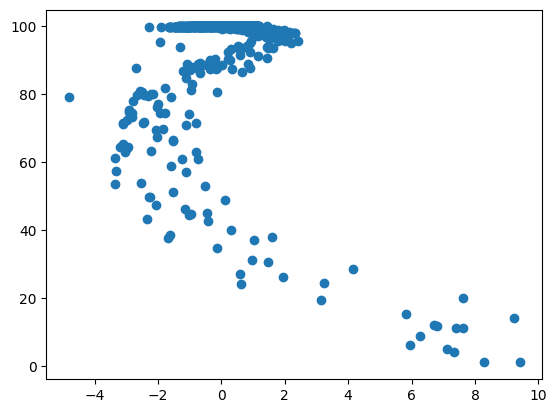

In [164]:
## residuals
residuals = y_pred-test_y
plt.scatter(residuals,test_y)

Text(0, 0.5, 'Predicted')

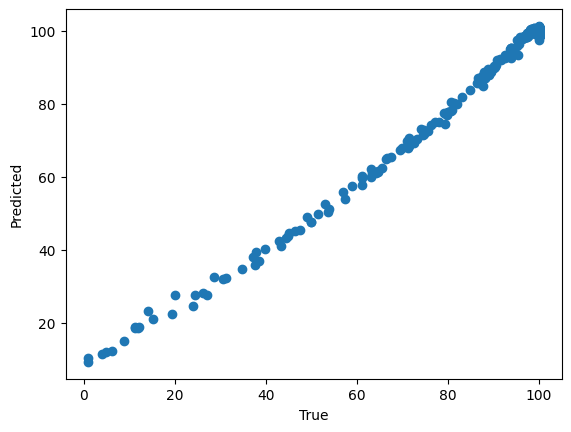

In [149]:
plt.scatter(test_y,y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')

<Axes: ylabel='Density'>

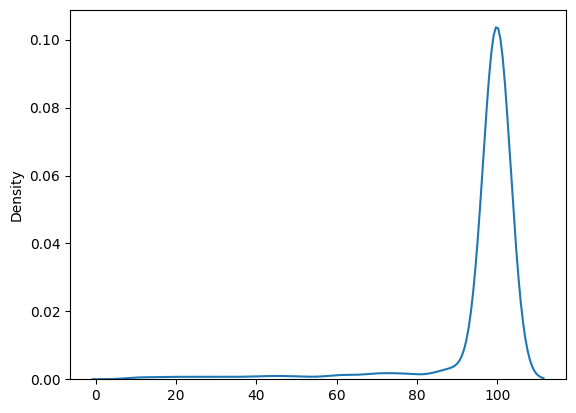

In [150]:
sns.kdeplot(y_pred)